In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy import integrate
from scipy.special import dawsn
import time

In [4]:
# system_par
M = 2
K1 = 3
K2 = 2
#K2 = 0
m_ls = np.array([1,1.2,1.4,1.7])
#m_ls = np.array([1,1,1,1])
K_intra = np.array([1.7,1.7,1.7,1.7,1.4,1.4,1.4,1.4,1,1])
#K_intra = np.array([1.5,1.5,1.5,1.5,1.4,1.4,1.4,1.4,1,1])

# driving_par
T_amp = 1
w0 = 1
sigma = 1


# initialize
sys_par, dr_par = initialize(M, m_ls, K1, K2, K_intra, T_amp, w0, sigma)


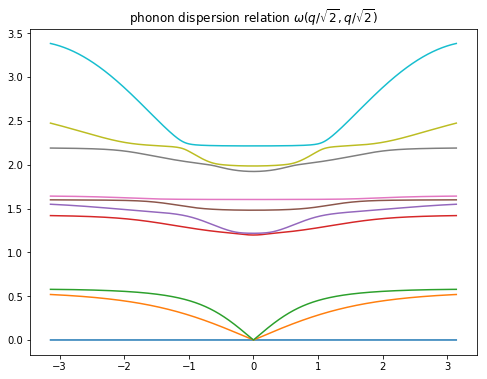

In [5]:
q = np.linspace(-np.pi,np.pi,4000)

eV = []

for qx in q:
    
    f2 = Eig(qx,0,sys_par)[0]
    eV.append(np.sqrt(np.sort(f2)+0.000001))


eV = np.array(eV).transpose()

fig, ax = plt.subplots(figsize = (8,6))

for i in range(10):
    plt.plot(q,eV[i],'-')

plt.title("phonon dispersion relation $\omega(q/\sqrt{2},q/\sqrt{2})$")


#plt.ylim(2.188,2.1895)
#plt.xlim(1.58,1.6)
plt.show()


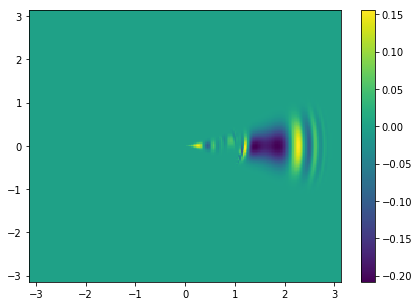

In [22]:
# (qx,qy) dependence of the energy contribution to (x, t) 

(x,t) = (10,0)
mesh = 201
e = []

qx_ls = np.linspace(-np.pi,np.pi,mesh)
qy_ls = np.linspace(-np.pi,np.pi,mesh)


X, Y = np.meshgrid(qx_ls,qy_ls)

for qx in qx_ls:
    for qy in qy_ls:
        try:
            e.append(energy_den_SingleQ(x, t, qx, qy, sys_par, dr_par))
        except:
            print(qx,qy)
            e.append(0)
Z = np.array(e).reshape(mesh,mesh).transpose()

fig, ax = plt.subplots(figsize = (7,5))

plt.pcolor(X, Y, Z)
plt.colorbar()
plt.show()


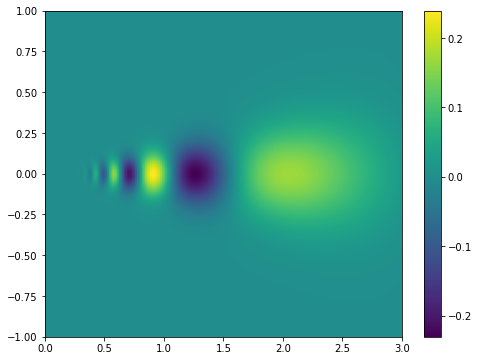

In [353]:
# (vx, vy) dependence of the energy contribution to (x, t)

(x,t) = (10,0)
mesh = 500
eV = []

vx_ls = np.linspace(0,3,mesh)
vy_ls = np.linspace(-1,1,mesh)


X, Y = np.meshgrid(vx_ls,vy_ls)

for vx in vx_ls:
    for vy in vy_ls:
        eV.append(energy_den_SingleV(x, t, dr_par, [vx,vy]))

Z = np.array(eV).reshape(mesh,mesh).transpose()

fig, ax = plt.subplots(figsize = (8,6))

plt.pcolor(X, Y, Z)
plt.colorbar()
plt.show()


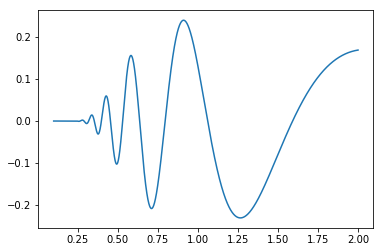

In [350]:
x = np.linspace(0.1,2,10000)
y=[]
for vx in x:
    try: 
        res = energy_den_SingleV(10, 0, dr_par, [vx,0])
    except:
        res = 0
        
    y.append(res)
plt.plot(x,y)

#print(energy_den_SingleV(10, 0, dr_par, [-8/9,0]))


In [ ]:
mesh = 200
v = []

qx_ls = np.linspace(-np.pi,np.pi,mesh)
qy_ls = np.linspace(-np.pi,np.pi,mesh)

for qx in qx_ls:
    for qy in qy_ls:
        w_ls, eigv_ls = Eig(qx,qy,sys_par)        
        v.append(([phonon_v(eigv_ls[i],w_ls[i],qx,qy,sys_par) for i in range(9)],qx,qy))


In [31]:



x_ls = range(26,40)
y_ls = []
for x in x_ls:
    print(x)
    y_ls.append(integrate.dblquad(lambda qx,qy:energy_den_SingleQ(x,0,qx,qy,sys_par,dr_par), -np.pi, np.pi, lambda qy: -np.pi, lambda qy: np.pi,epsrel = 0.001))



26
27


C:\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


28
29
30
31
32
33
34
35
36
37
38


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in cdouble_scalars
C:\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
C:\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


39


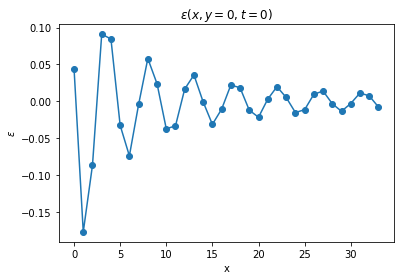

In [23]:
y_ls=[(-35.15687540571049, 0.031015459344283392), 
(-7.389170040687646, 0.003499934248521356), 
(-0.24048507293069923, 0.0001644697263472104), 
(0.044240283654582754, 4.7339202251566855e-05), 
(-0.17716728445408225, 0.00015853858558913416), 
(-0.08650860772112294, 8.132248673823063e-05), 
(0.0910088323476044, 9.748815302040939e-05), 
(0.08467387022069733, 8.835342081994611e-05), 
(-0.03264227875585864, 4.711517018535248e-05), 
(-0.07397320924451238, 0.00010623949181229647),
(-0.004293052427587846, 1.2183554110518224e-05),
(0.058030837729284725, 8.236122634094511e-05),
(0.023837453682322575, 4.5493771810842206e-05),
(-0.037258726431333315, 6.506578579977551e-05),
(-0.033255823677151373, 8.026710095052606e-05),
(0.016740292723961613, 3.8303268629632924e-05),
(0.0357322638993957, 9.096884570003377e-05),
(-0.0008404990639194372, 1.894434866691122e-05),
(-0.031223373686154795, 8.458919893911128e-05),
(-0.010685449375393124, 5.221515256569575e-05),
(0.02212592275936911, 7.126600617529593e-05),
(0.018417697295330125, 6.749879003920578e-05),
(-0.012027582141420919, 4.378567476746711e-05),
(-0.021596662324382964, 8.626803012376166e-05),
(0.0028915245383327646, 6.993769534811822e-06),
(0.0198425089893624, 9.020215218824405e-05), 
(0.005262297471365693, 2.7030193432828413e-05), 
(-0.015199249702750597, 8.103379938691457e-05), 
(-0.011370230693154362, 4.6695300441622345e-05), 
(0.009565985266719769, 5.556817547258832e-05), 
(0.013974886301858787, 6.640002180210744e-05), 
(-0.0032626359982818962, 2.4795083629070014e-05), 
(-0.013522733859442488, 6.787414693189275e-05), 
(-0.002952011757895541, 1.6459830393119534e-05), 
(0.01127954207834175, 5.3566958610710845e-05), 
(0.007481603054780978, 3.8486941817132845e-05), 
(-0.0076143411312746875, 3.8545037533451734e-05)]

yy=[y_ls[i][0] for i in range(len(y_ls))]
yy_abs=[abs(y_ls[i][0]) for i in range(len(y_ls))]
plt.title(r'$\epsilon (x,y=0,t=0)$')
plt.xlabel('x')
plt.ylabel(r'$\epsilon$')
#plt.yscale('log')

plt.plot(yy[3:],'o-')


In [2]:
def initialize(M, m_ls, K1, K2, K_intra, T_amp, w0, sigma):
    M_intra = Matrix_intra(M,m_ls,K_intra)

    return ([M_intra, M, K1, K2, K_intra, m_ls],[T_amp, w0, sigma])

def energy_den_SingleQ(x, t, qx, qy, sys_par, dr_par):

    w_ls, eigv_ls = Eig(qx,qy,sys_par)
    
    velocities = [phonon_v(eigv_ls[i],w_ls[i],qx,qy,sys_par) for i in range(9)]
    res = 0
    
    for v in velocities:
        if (np.linalg.norm(v) != 0):
            res += energy_den_SingleV(x, t, dr_par, v)

        
    return res
def energy_den_SingleV(x, t, dr_par, ph_v):
    
    T_amp, w0, sigma = dr_par
    
    
    vx = ph_v[0]
    v = np.linalg.norm(ph_v)
    
    
    x0 = x * vx / v
    
    if (x0**2 > x**2):
        y0 = 0
    else:
        y0 = np.sqrt(x**2-x0**2)
    
    prefactor =  (1/(2*np.pi*sigma**2)) * np.exp(-y0**2/(2*sigma**2)) * (T_amp*w0)
    

    I = (-sigma/(4*v))*np.sqrt(8) * (2*np.real(np.exp(-1j * w0 * (t - x0/v)) * np.exp(-(x0**2*v+2j*w0*x0*sigma**2)/(2*v*sigma**2)) * dawsn((-2j*x0*v + 2*sigma**2*w0)/(v* sigma * np.sqrt(8)))))
    I_inf = -np.sqrt(np.pi / 2) * sigma / v *np.exp(-0.5 * (sigma * w0 / v)**2)*np.sin((t - x0/v)*w0)
  
    return prefactor * (I-I_inf)




def phonon_v(vec,w,qx,qy,sys_par):
    
    M  = sys_par[1]
    K1 = sys_par[2]
    K2 = sys_par[3]
    
    K1=K1/M
    K2=K2/M
    
    
    diag_x_x  = -2*K1*np.sin(qx)-K2/np.sqrt(2)*(np.sin((qx+qy)/np.sqrt(2))+np.sin((qx-qy)/np.sqrt(2)))
    diag_y_x  = -K2/np.sqrt(2)*(np.sin((qx+qy)/np.sqrt(2))+np.sin((qx-qy)/np.sqrt(2)))
    off_d_x = -K2/np.sqrt(2)*(np.sin((qx+qy)/np.sqrt(2))-np.sin((qx-qy)/np.sqrt(2)))


    
    diag_x_y  = -K2/np.sqrt(2)*(np.sin((qy+qx)/np.sqrt(2))+np.sin((qy-qx)/np.sqrt(2)))
    diag_y_y  = -2*K1*np.sin(qy)-K2/np.sqrt(2)*(np.sin((qy+qx)/np.sqrt(2))+np.sin((qy-qx)/np.sqrt(2)))
    off_d_y = -K2/np.sqrt(2)*(np.sin((qy+qx)/np.sqrt(2))-np.sin((qy-qx)/np.sqrt(2)))


    
    ax = vec[0]*vec[0]*diag_x_x + vec[5]*vec[5]*diag_y_x + 2*(vec[0]*vec[5])*off_d_x  #expectation value of the derivative operator   
    ay = vec[0]*vec[0]*diag_x_y + vec[5]*vec[5]*diag_y_y + 2*(vec[0]*vec[5])*off_d_y  #expectation value of the derivative operator
    vx = -ax/(2*np.sqrt(w+0.000000001))
    vy = -ay/(2*np.sqrt(w+0.000000001))
    
    return np.array([vx,vy])


    
def Eig(qx,qy,sys_par):
    M_intra = sys_par[0]
    M_inter = Matrix_inter(qx,qy,sys_par)
    eigVal, eigVec = np.linalg.eigh(M_intra+M_inter)
    return -eigVal, eigVec.transpose()



def rescale_K(M,m,K):
    factors = np.array([np.sqrt(M*m[0]),np.sqrt(M*m[1]),np.sqrt(M*m[2]),np.sqrt(M*m[3]),np.sqrt(m[0]*m[1]),np.sqrt(m[1]*m[2]),np.sqrt(m[2]*m[3]),np.sqrt(m[3]*m[0]),np.sqrt(m[0]*m[2]),np.sqrt(m[1]*m[3])])
    return K/factors


def Matrix_inter(qx,qy,sys_par):
    
    M  = sys_par[1]
    K1 = sys_par[2]
    K2 = sys_par[3]
    
    K1=K1/M
    K2=K2/M
    
    diag_x  = -4*K1*(np.sin(qx/2)**2)-2*K2*(np.sin((qx+qy)/np.sqrt(8))**2+np.sin((qx-qy)/np.sqrt(8))**2)
    diag_y  = -4*K1*(np.sin(qy/2)**2)-2*K2*(np.sin((qx+qy)/np.sqrt(8))**2+np.sin((qx-qy)/np.sqrt(8))**2)
    off_d = -2*K2*(np.sin((qx+qy)/np.sqrt(8))**2-np.sin((qx-qy)/np.sqrt(8))**2)
    
    res = np.zeros([10,10])
    
    res[0][0] = diag_x
    res[5][5] = diag_y
    res[0][5] = off_d
    res[5][0] = off_d
    
    return res
    
    

def Matrix_intra(M,m,K_intra):
    
    K = rescale_K(M,m,K_intra)
    
    res = np.zeros([10,10])
    #spring 1
    res[5][5]-=K[0]
    res[5][6]+=K[0]
    res[6][6]-=K[0]
    res[6][5]+=K[0]
    #spring 2
    res[0][0]-=K[1]
    res[0][2]+=K[1]
    res[2][2]-=K[1]
    res[2][0]+=K[1]
    #spring 3
    res[5][5]-=K[2]
    res[5][8]+=K[2]
    res[8][8]-=K[2]
    res[8][5]+=K[2]
    #spring 4
    res[0][0]-=K[3]
    res[0][4]+=K[3]
    res[4][4]-=K[3]
    res[4][0]+=K[3]
    #spring 5
    res[1][1]-=K[4]/2
    res[1][2]+=K[4]/2
    res[1][6]+=K[4]/2
    res[1][7]-=K[4]/2
    res[6][1]+=K[4]/2
    res[6][2]-=K[4]/2
    res[6][6]-=K[4]/2
    res[6][7]+=K[4]/2

    res[2][2]-=K[4]/2
    res[2][1]+=K[4]/2
    res[2][7]+=K[4]/2
    res[2][6]-=K[4]/2
    res[7][2]+=K[4]/2
    res[7][1]-=K[4]/2
    res[7][7]-=K[4]/2
    res[7][6]+=K[4]/2

    #spring 6
    res[2][2]-=K[5]/2
    res[2][3]+=K[5]/2
    res[2][7]-=K[5]/2
    res[2][8]+=K[5]/2
    res[7][2]-=K[5]/2
    res[7][3]+=K[5]/2
    res[7][7]-=K[5]/2
    res[7][8]+=K[5]/2

    res[3][3]-=K[5]/2
    res[3][2]+=K[5]/2
    res[3][8]-=K[5]/2
    res[3][7]+=K[5]/2
    res[8][3]-=K[5]/2
    res[8][2]+=K[5]/2
    res[8][8]-=K[5]/2
    res[8][7]+=K[5]/2

    #spring 7
    res[3][3]-=K[6]/2
    res[3][4]+=K[6]/2
    res[3][8]+=K[6]/2
    res[3][9]-=K[6]/2
    res[8][3]+=K[6]/2
    res[8][4]-=K[6]/2
    res[8][8]-=K[6]/2
    res[8][9]+=K[6]/2

    res[4][4]-=K[6]/2
    res[4][3]+=K[6]/2
    res[4][9]+=K[6]/2
    res[4][8]-=K[6]/2
    res[9][4]+=K[6]/2
    res[9][3]-=K[6]/2
    res[9][9]-=K[6]/2
    res[9][8]+=K[6]/2
    
    #spring 8
    res[4][4]-=K[7]/2
    res[4][1]+=K[7]/2
    res[4][9]-=K[7]/2
    res[4][6]+=K[7]/2
    res[9][4]-=K[7]/2
    res[9][1]+=K[7]/2
    res[9][9]-=K[7]/2
    res[9][6]+=K[7]/2

    res[1][1]-=K[7]/2
    res[1][4]+=K[7]/2
    res[1][6]-=K[7]/2
    res[1][9]+=K[7]/2
    res[6][1]-=K[7]/2
    res[6][4]+=K[7]/2
    res[6][6]-=K[7]/2
    res[6][9]+=K[7]/2
    
    #spring 9
    res[6][6]-=K[8]
    res[6][8]+=K[8]
    res[8][8]-=K[8]
    res[8][6]+=K[8]
    
    #spring 10
    res[2][2]-=K[9]
    res[2][4]+=K[9]
    res[4][4]-=K[9]
    res[4][2]+=K[9]
    
    return res



In [292]:
# older version of the program

from scipy.special import erfi

def energy_den_SingleV_old_version(x, t, dr_par, ph_v):
    
    T_amp, w0, sigma = dr_par
    
    
    vx = ph_v[0]
    v = np.linalg.norm(ph_v)
    
    
    
    
    x0 = x * vx / v
    
    y0 = np.sqrt(x**2-x0**2)
    
    prefactor =  (1/(2*np.pi*sigma**2)) * np.exp(-y0**2/(2*sigma**2)) * (T_amp*w0)
    
    
    

    


    I = (-sigma/(4*v))*np.sqrt(2*np.pi)*np.exp(-2*(sigma*w0/(2*v))**2) * (2*np.real(np.exp(-1j * w0 * (t - x0/v)) * (erfi((-2j*x0*v + 2*sigma**2*w0)/(v* sigma * np.sqrt(8)))-1j )  ))
    
    
    return prefactor * I




#print(erfi(40))
#print(erf(100+0.25j))


1.474797539628785e+172


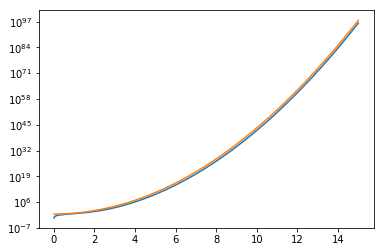

In [221]:
x = np.linspace(0.01,15,100000)

#y = [energy_den_SingleV(10, 0, dr_par, [j, 2]) for j in x]

y = [erfi(i) for i in x]
y1 = [np.exp(i**2) for i in x]

yy = [y[i]*y1[i] for i in range(len(x))]

plt.yscale('log')

plt.plot(x,y)
plt.plot(x,y1)

print(erfi(20))

In [231]:


x = 10+1j
print (np.exp(-x**2)*erfi(x))
print (2/np.pi**0.5 * dawsn(x))

(0.05612964531595126-0.005669942566902182j)
(0.056129645315951264-0.005669942566902179j)


In [338]:
def energy_den_SingleV(x, t, dr_par, ph_v):
    
    T_amp, w0, sigma = dr_par
    
    
    vx = ph_v[0]
    v = np.linalg.norm(ph_v)
    
    
    x0 = x * vx / v
    
    if (x0**2 > x**2):
        y0 = 0
    else:
        y0 = np.sqrt(x**2-x0**2)
    
    prefactor =  (1/(2*np.pi*sigma**2)) * np.exp(-y0**2/(2*sigma**2)) * (T_amp*w0)
    

    I = (-sigma/(4*v))*np.sqrt(8) * (2*np.real(np.exp(-1j * w0 * (t - x0/v)) * np.exp(-(x0**2*v+2j*w0*x0*sigma**2)/(2*v*sigma**2)) * dawsn((-2j*x0*v + 2*sigma**2*w0)/(v* sigma * np.sqrt(8)))))
    I_inf = -np.sqrt(np.pi / 2) * sigma / v*np.exp(-0.5 * (sigma * w0 / v)**2)*np.sin((t - x0/v)*w0)
    
    return prefactor * (I-I_inf)

print(energy_den_SingleV(10, 0, dr_par, [-16/9,0]))

-3.533949646070574e-17
